# Corner Detector Training 🧠📐
This notebook is designed to train a model for detecting chessboard corners. Each step is explained in detail with clear instructions and descriptions.

### 📦 Installing Additional Dependencies
This step installs two important libraries required for the corner detection training process:
- Ultralytics: A library that supports YOLO (You Only Look Once) models for object detection.
- Roboflow: A tool for dataset management and machine learning workflow optimization.

In [ ]:
!pip install ultralytics roboflow tabulate matplotlib tqdm

### 📚 Importing Essential Libraries
This step imports the necessary libraries for downloading the dataset, training the YOLO model, and organizing the outputs.

In [83]:
from roboflow import Roboflow
from ultralytics import YOLO
from glob import glob
from tabulate import tabulate
import matplotlib.pyplot as plt
import os
from shutil import move, rmtree
import random
from tqdm import tqdm

### 📂 Downloading the Dataset Using Roboflow
In this step, we are using the Roboflow API to download the dataset for chessboard corner detection.

In [10]:
rf = Roboflow(api_key="CWXP8SPXMclAxwcftpbL")
project = rf.workspace("chessboard-corner-detection-3b5bs").project("chessboard-detection-yqcnu")
version = project.version(3)
dataset = version.download("yolov11")                

loading Roboflow workspace...
loading Roboflow project...


### 🖼️ Loading Dataset Images
In this step, we load the image paths for the training, validation, and testing datasets.

In [35]:
train_images = glob("chessboard-detection-3/train/images/*.jpg")
valid_images = glob("chessboard-detection-3/valid/images/*.jpg")
test_images = glob("chessboard-detection-3/test/images/*.jpg")

### 🔢 Calculating Dataset Counts and Percentages
Here, we calculate the count of images in each dataset and their percentage of the total dataset.

In [36]:
train_count = len(train_images)
valid_count = len(valid_images)
test_count = len(test_images)
total_count = train_count + valid_count + test_count

train_percentage = (train_count / total_count) * 100 if total_count > 0 else 0
valid_percentage = (valid_count / total_count) * 100 if total_count > 0 else 0
test_percentage = (test_count / total_count) * 100 if total_count > 0 else 0

### 📋 Creating and Displaying the Dataset Summary Table
Now, we organize the counts and percentages into a formatted table for better visualization.

In [38]:
print(f"{'Dataset':<12}{'Count':<8}{'Percentage':<12}")
print("-" * 32)

print(f"{'Train':<12}{train_count:<8}{train_percentage:>11.2f}%")
print(f"{'Validation':<12}{valid_count:<8}{valid_percentage:>11.2f}%")
print(f"{'Test':<12}{test_count:<8}{test_percentage:>11.2f}%")
print(f"{'Total':<12}{total_count:<8}{100.00:>11.2f}%")

Dataset     Count   Percentage  
--------------------------------
Train       21004         87.59%
Validation  1990           8.30%
Test        986            4.11%
Total       23980        100.00%


### 📊 Visualizing Dataset Distribution with a Pie Chart
Lets create a pie chart to visually represent the distribution of the dataset among training, validation, and testing splits.

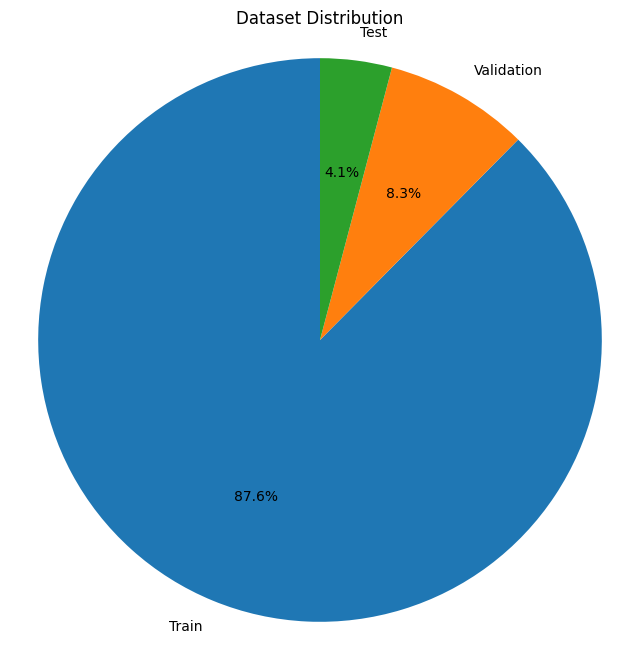

In [50]:
labels = ['Train', 'Validation', 'Test']
counts = [train_count, valid_count, test_count]
total_count = sum(counts)
sizes = [(count / total_count) * 100 for count in counts]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Dataset Distribution")
plt.axis('equal')
plt.show()

---

## ⚠️ Problem in Dataset Distribution

The current dataset distribution is imbalanced and does not follow an ideal split for machine learning tasks:

- **Current Distribution**:
  - **Train**: 87.59%
  - **Validation**: 8.30%
  - **Test**: 4.11%

An ideal distribution should be approximately **70% training**, **20% validation**, and **10% testing** to ensure sufficient data for training while reserving enough for validation and testing.

---

## 🔧 Let's Fix the Dataset Distribution

We will redistribute the dataset into the ideal proportions:
- **70%** for training
- **20%** for validation
- **10%** for testing

This redistribution will improve the model's generalization and provide better validation and testing metrics. 

Next, let's adjust the dataset splits accordingly. 🛠️

---

In [60]:
all_images_dir = "chessboard-detection-3/all/images"
all_labels_dir = "chessboard-detection-3/all/labels"

In [61]:
os.makedirs(all_images_dir, exist_ok=True)
os.makedirs(all_labels_dir, exist_ok=True)

In [63]:
for image_path in tqdm(all_images):
    image_name = os.path.basename(image_path)
    label_name = os.path.splitext(image_name)[0] + ".txt"
    label_path = os.path.join(os.path.dirname(image_path).replace("images", "labels"), label_name)
    
    move(image_path, os.path.join(all_images_dir, image_name))
    move(label_path, os.path.join(all_labels_dir, label_name))

In [71]:
all_images = glob(all_images_dir + "/*.jpg")

In [69]:
split_ratios = {'train': 0.7, 'valid': 0.2, 'test': 0.1}

In [74]:
random.shuffle(all_images)

In [75]:
total_count = len(all_images)

split_counts = {key: int(ratio * total_count) for key, ratio in split_ratios.items()}
split_counts['test'] = total_count - sum(split_counts.values()) + split_counts['test']

splits = {}
start = 0
for split_name, count in split_counts.items():
    splits[split_name] = all_images[start:start + count]
    start += count

In [77]:
for split_name in split_ratios.keys():
    os.makedirs(f"chessboard-detection-3/{split_name}/images", exist_ok=True)
    os.makedirs(f"chessboard-detection-3/{split_name}/labels", exist_ok=True)

In [ ]:
for split_name, images in splits.items():
    for image_path in tqdm(images):
        image_name = os.path.basename(image_path)
        label_name = os.path.splitext(image_name)[0] + ".txt"
        
        target_image_dir = f"chessboard-detection-3/{split_name}/images"
        target_label_dir = f"chessboard-detection-3/{split_name}/labels"
        
        move(image_path, os.path.join(target_image_dir, image_name))
        
        label_path = os.path.join(all_labels_dir, label_name)
        if os.path.exists(label_path):
            move(label_path, os.path.join(target_label_dir, label_name))

In [84]:
rmtree("chessboard-detection-3/all")

### ✅ Dataset Redistribution Complete
The dataset has been successfully redistributed to achieve the ideal proportions of 70% training, 20% validation, and 10% testing.

Now, let's visualize the new dataset distribution to confirm the adjustments. 🎉

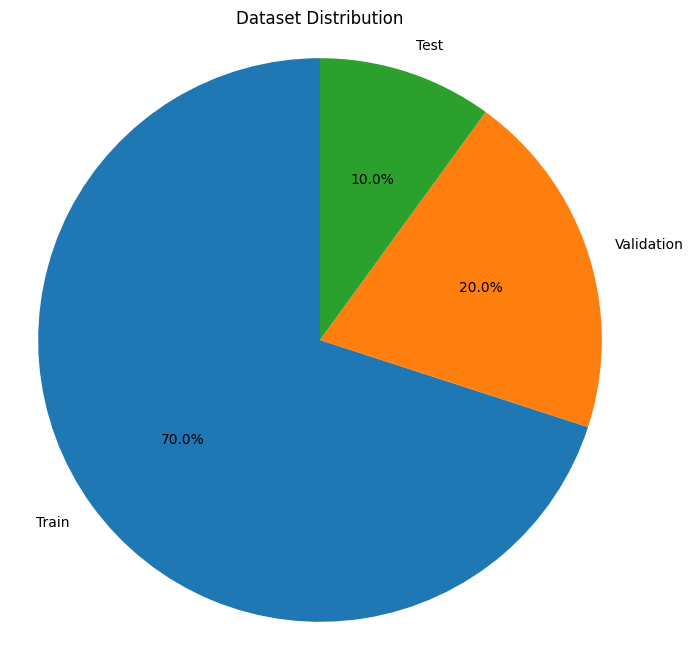

In [86]:
train_images = glob("chessboard-detection-3/train/images/*.jpg")
valid_images = glob("chessboard-detection-3/valid/images/*.jpg")
test_images = glob("chessboard-detection-3/test/images/*.jpg")

labels = ['Train', 'Validation', 'Test']
counts = [len(train_images), len(valid_images), len(test_images)]
total_count = sum(counts)
sizes = [(count / total_count) * 100 for count in counts]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Dataset Distribution")
plt.axis('equal')
plt.show()

### 📥 Downloading the YOLOv11 Nano Model
To kickstart the training process, we will download the YOLOv11 Nano model. This version is lightweight and optimized for fast inference and minimal resource usage, making it an excellent choice for our corner detection task.

In [ ]:
model = YOLO('yolo11n.pt')

---

### 📝 Adjusting the `data.yaml` File

Before starting the training, we need to update the `data.yaml` file. This file defines the paths to the training, validation datasets, and the class labels. Adjusting it ensures that the model trains on the correct dataset splits.

---

### 🚀 Starting the Training Process

Once the `data.yaml` file is correctly configured, we will initiate the training of the **YOLOv11 Nano** model. This will involve multiple epochs to optimize the model for corner detection.

Let’s begin! 🔥

---

In [ ]:
model.train("chessboard-detection-3/data.yaml", epochs=100)

### 🎉 Training Complete!

After the training process is finished, you can find the trained model saved under:

**`weights/best.pt`**

The model is now ready to be used. Happy Hacking! 🚀✨